## Image Augmentation and oversampling ##
For classes with <150 images, augement and resample (aka oversample): That will give a minimum of 30 samples for testing and validation each

For classe with <500k images, subsampling (undersample) down to 100k

In [1]:
import glob, os, random
from keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.utils import img_to_array, array_to_img,load_img

2023-02-16 17:25:55.534548: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-02-16 17:25:55.796899: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-02-16 17:25:56.607877: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvrtc.so.11.1: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/pcdaniel/Documents/linux-stuff/TensorRT-7.2.2.3/lib:/home/pcdaniel/Documents/linux-stuff/TensorRT-7.2.2.3/lib::/usr/local/lib:/usr/lib/cuda/lib64:/usr/local/lib:/usr/lib/cuda/lib64:/home/pcdaniel/anaconda3

In [2]:
def tree_count(parent_dir, sort=False):
    """ return number of files in subdirectories of data_dir """
    data_dirs = os.listdir(parent_dir)
    counts = []

    for ddir in data_dirs:
        count = 0
        for path in os.scandir(os.path.join(parent_dir, ddir)):
            if path.is_file():
                count += 1
        counts.append(count)
    
    if sort:
        counts, data_dirs = zip(*sorted(zip(counts, data_dirs)))
    
    return counts, data_dirs

In [22]:
counts, data_dirs = tree_count("/home/pcdaniel/Documents/IFCB/image-extraction/20230216_extracted")

In [26]:
len(data_dirs)

52

In [7]:
over_size = [ (cl, cnt) for cl, cnt in zip(data_dirs, counts) if cnt < 150]

In [23]:
for name, cnt in zip(counts, data_dirs):
    print(name, cnt)

2606 Gymnodinium
0 UNUSED
3325 Ciliates
4183 Leptocylindrus
150 Phaeocystis
261 Pleurosigma
693 Amy_Gony_Protoc
150 Boreadinium
188 Ditylum
543 Guin_Dact
752 Dictyocha
6246 FlagMix
212 Vicicitus
2083 Eucampia
852 Skeletonema
1713 Pseudo-nitzschia
9497 Peridinium
4315 Det_Cer_Lau
421 Tiarina
192 Lingulodinium
184 Pyramimonas
150 Polykrikos
460 Torodinium
4129 Cochlodinium
150 Odontella
150 Hemiaulus
150 Protoperidinium
11936 Pennate
563949 NanoP_less10
13239 Chaetoceros
3362 Dinophysis
464 Rhiz_Prob
839 Clusterflagellate
315 Corethron
150 Licmophora
3478 Ceratium
166 Tintinnid
2395 Cyl_Nitz
32522 Prorocentrum
1998 Asterionellopsis
321 Entomoneis
28142 Centric
31244 Akashiwo
4299 Alexandrium_singlet
8844 Scrip_Het
191 Tropidoneis
467 Tontonia
219 Gyrodinium
2734 Thalassiosira
1580 Cryptophyte
614 Mesodinium
302 Thalassionema


In [21]:
datagen = ImageDataGenerator(
        rescale=1./255,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest')

base_dir = "/home/pcdaniel/Documents/IFCB/image-extraction/20230216_extracted/"
for name, cnt in over_size:
        if name != "UNUSED":
                data_dir = os.path.join(base_dir,name)
                fnames = glob.glob(os.path.join(data_dir,"*.png"))
                for j in range(150 - len(fnames)):
                        ix = random.randint(0,len(fnames)-1)
                        img = load_img(os.path.join(data_dir,fnames[ix]))  # this is a PIL image
                        x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
                        x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)
                        i = 0
                        for batch in datagen.flow(x, batch_size=1,
                                                        save_to_dir=os.path.join(base_dir,data_dir), save_prefix='synth_{}'.format(j), save_format='png'):
                                i += 1
                                if i == 1:
                                        break  # otherwise the generator would loop indefinitely

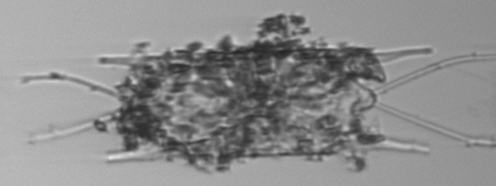

In [17]:
150

In [25]:
len(name)

TypeError: object of type 'int' has no len()